In [1]:
from pathlib import Path

import os
import pylab as plt
from skimage import io
import numpy as np
import json
import torch
import argparse
import albumentations as A
from tracenet.utils.loader import get_loaders
from tracenet.utils.plot import plot_keypoints, plot_traces, show_imgs

In [2]:
path = '/research/sharedresources/cbi/data_exchange/hangrp/Development/mt_detection/'
percentiles = (1, 95)


data_dir = path + 'data_synth/aster_with_spindle_high_contrast'
img_dir = 'img'
gt_dir = 'csv'

# data_dir = '/research/sharedresources/cbi/data_exchange/hangrp/Development/mt_detection/data/training_data'
# img_dir = 'img'
# gt_dir = 'traces'

train_dir = 'train'
val_dir = 'val'
bs = 2

In [3]:
# from tracenet.datasets.custom_transforms import GaussianNoise, GaussianBlur
# from torchvision import transforms

# tr = transforms.Compose([
#         # GaussianBlur([1.5, 2], 1),
#         GaussianNoise([0.01, 0.05], 0.5),
#         # RandomBrightnessContrast(brightness=(-0.1, 0.1), contrast=(0.8, 1.2), probability=0.5),
#     ])

In [4]:
train_dl, val_dl = get_loaders(data_dir, train_dir=train_dir, val_dir=val_dir, 
                               img_dir=img_dir, gt_dir=gt_dir, batch_size=bs, 
                               # intensity_transform=tr,
                               percentiles=percentiles, shuffle=False, n_points=7)

In [5]:
ind = 1

In [6]:
arr = []
for i in range(25):
    imgs1, imgs2, targets = next(iter(train_dl))
    arr.append(imgs1[ind][0].numpy())

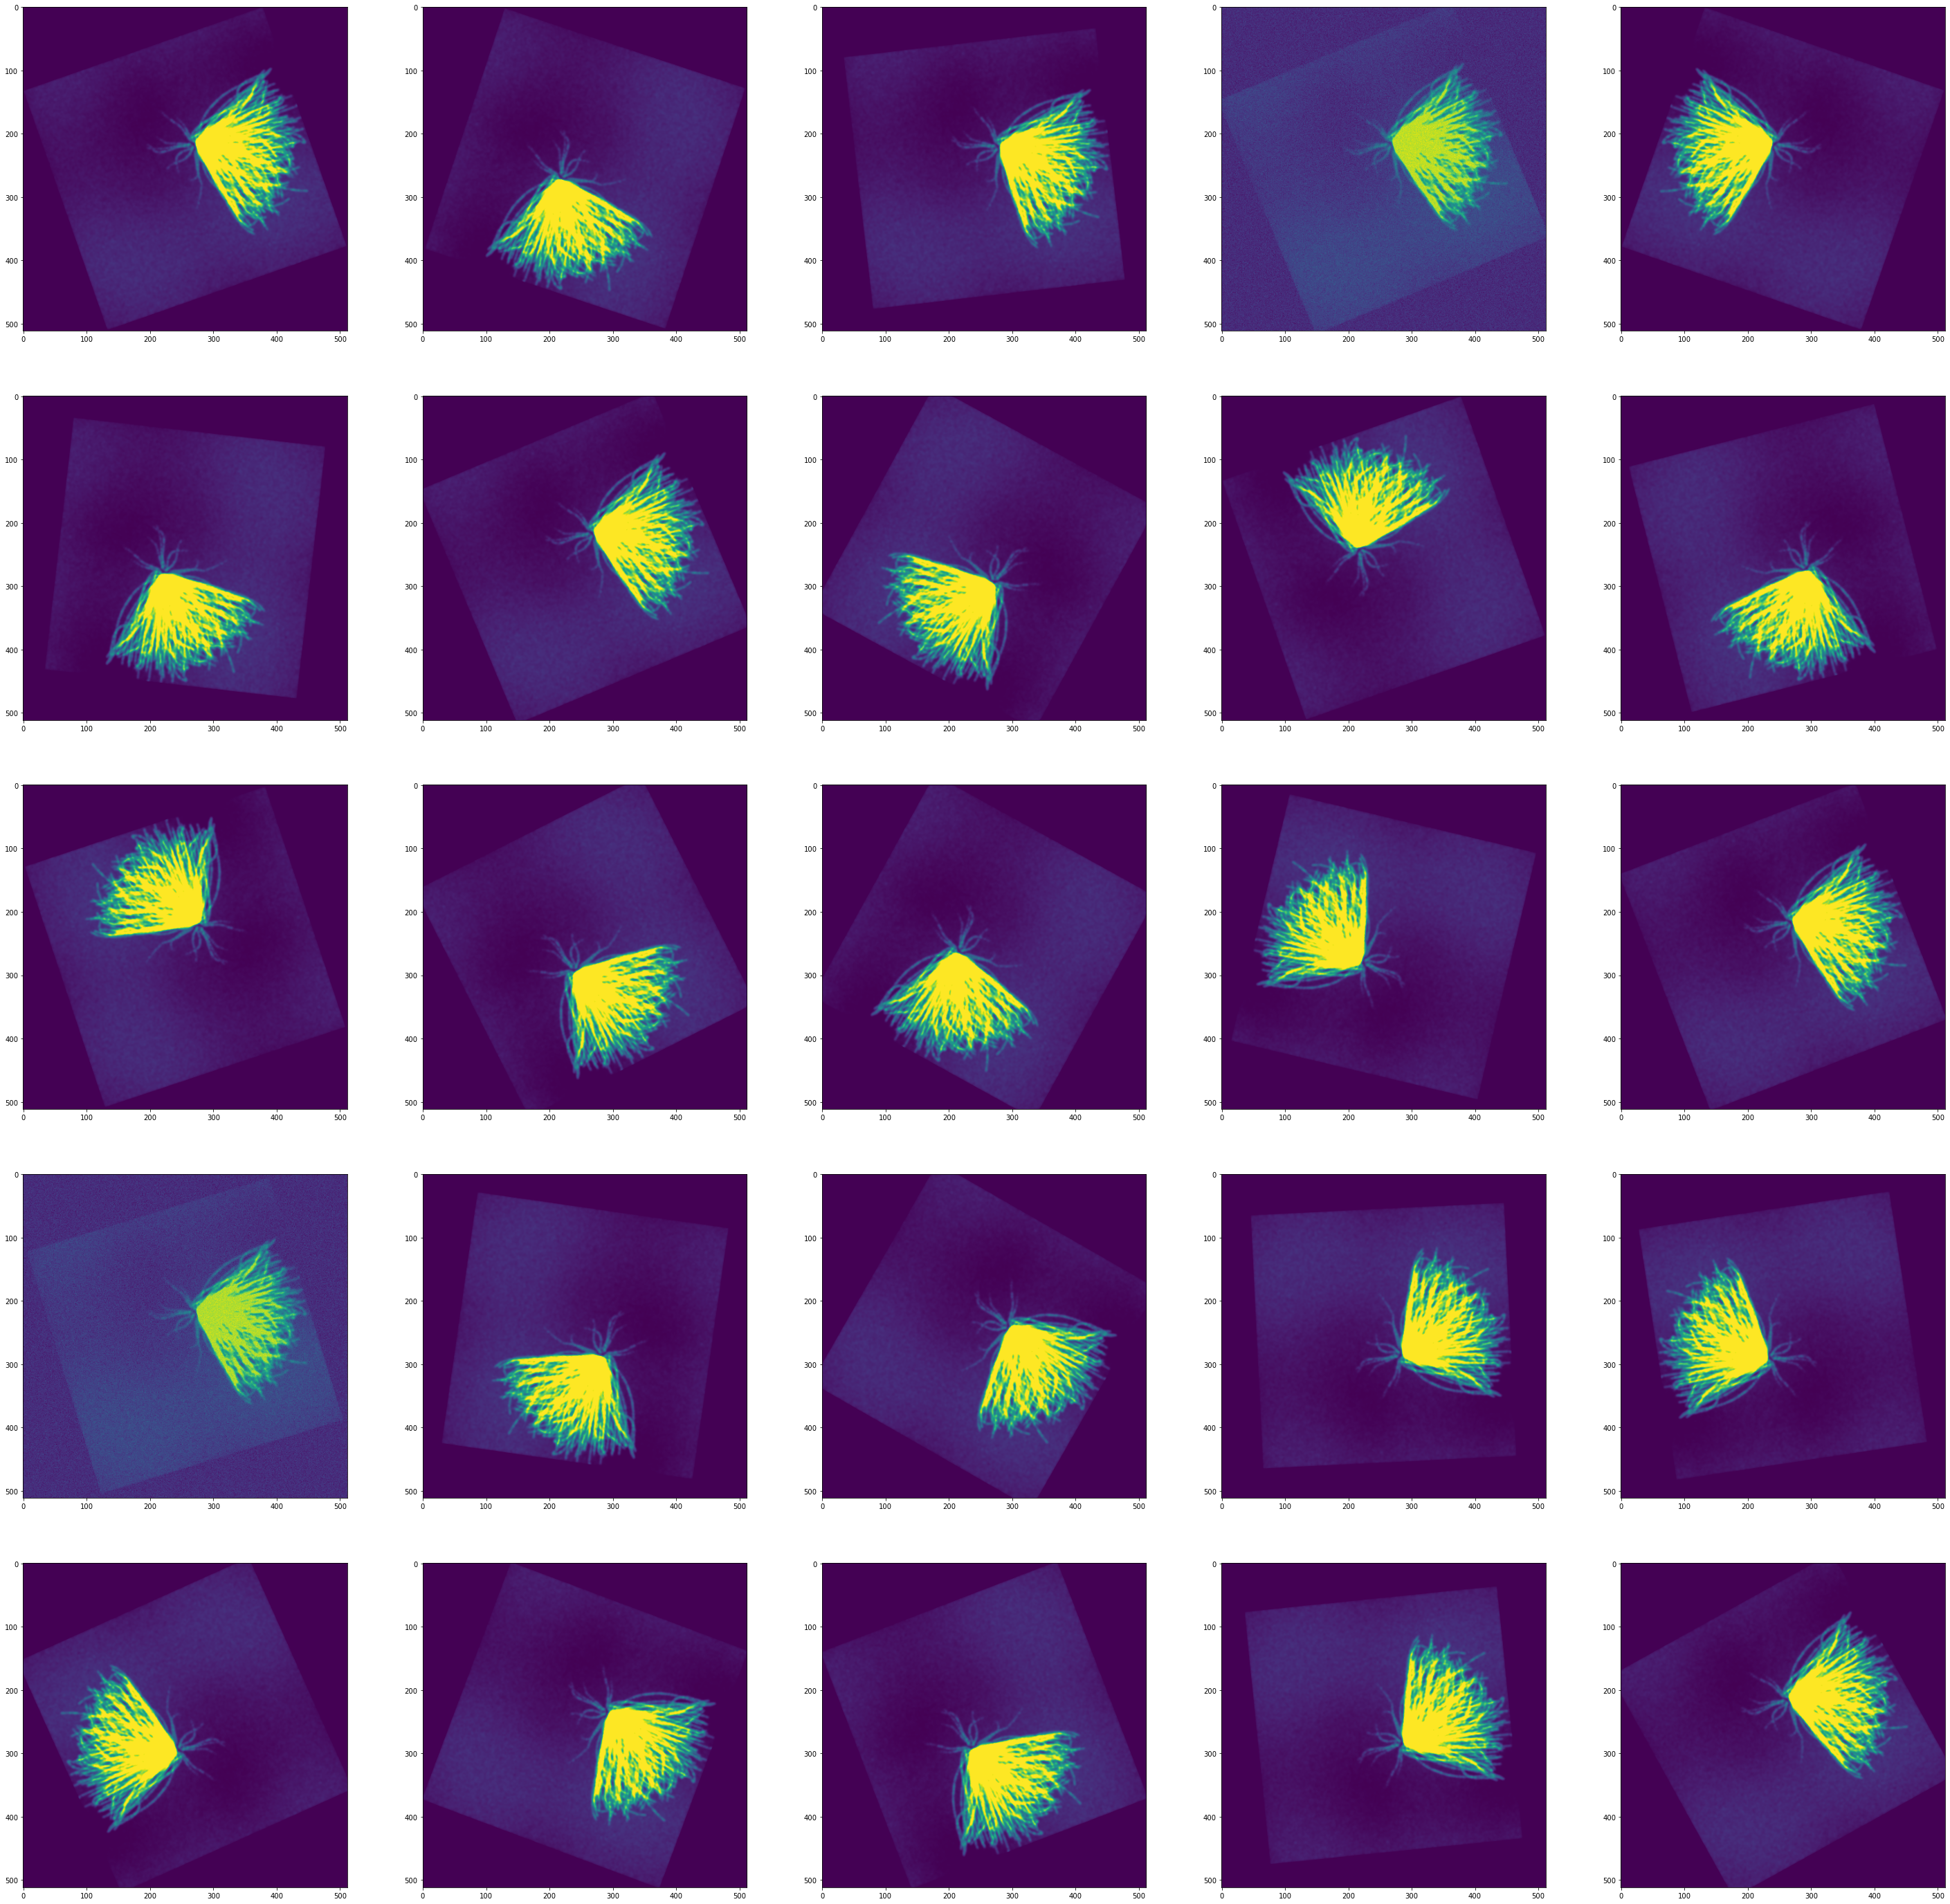

In [7]:
fig, axes = plt.subplots(5, 5, figsize=(50,50))
for ax, x in zip(axes.ravel(), arr):
    ax.imshow(x)

/research/sharedresources/cbi/public/conda_envs/am_pytorch/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


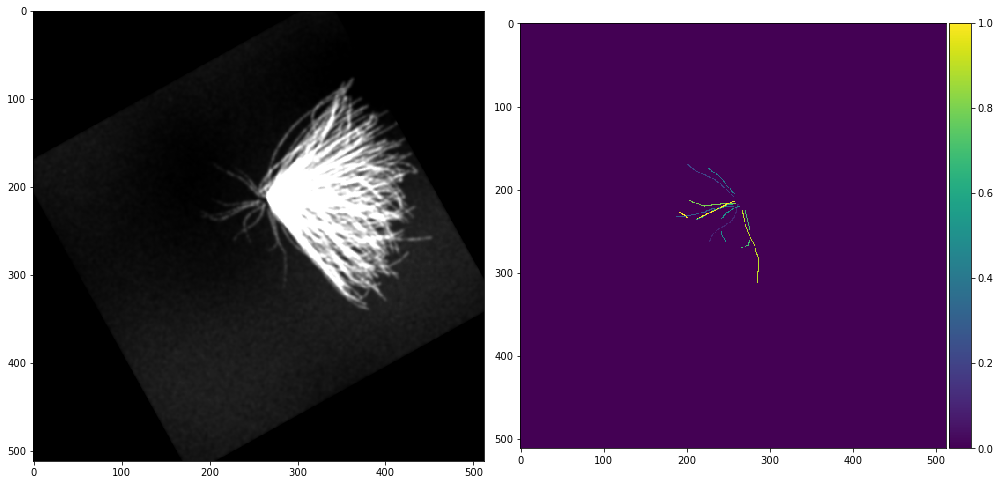

In [8]:
show_imgs([imgs1[ind][0], targets['labeled_mask'][ind]], s=7, norm=True)

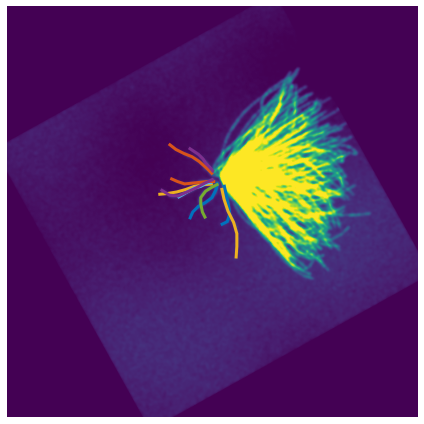

In [9]:
img_gt = plot_keypoints(imgs1[ind][0], targets['keypoints'][ind], targets['point_labels'][ind], return_image=True)

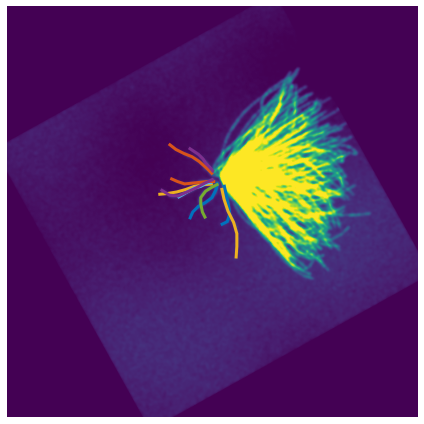

In [10]:
img_gt = plot_traces(imgs1[ind][0], targets['trace'][ind], n_points=7, return_image=True)